In [2]:
import rdkit
from rdkit import Chem

In [11]:
import rdkit
from rdkit import Chem

drugbank_input = Chem.SDMolSupplier("/home/charlesseo/zinc/structures.sdf")

In [12]:
len(drugbank_input)

11300

In [13]:
type(drugbank_input)

rdkit.Chem.rdmolfiles.SDMolSupplier

In [14]:
drugbank = [m for m in drugbank_input if m]

RDKit ERROR: [18:17:35] Explicit valence for atom # 13 Cl, 5, is greater than permitted
RDKit ERROR: [18:17:35] ERROR: Could not sanitize molecule ending on line 289199
RDKit ERROR: [18:17:35] ERROR: Explicit valence for atom # 13 Cl, 5, is greater than permitted
RDKit ERROR: [18:17:35] Explicit valence for atom # 19 O, 3, is greater than permitted
RDKit ERROR: [18:17:35] ERROR: Could not sanitize molecule ending on line 399275
RDKit ERROR: [18:17:35] ERROR: Explicit valence for atom # 19 O, 3, is greater than permitted
RDKit ERROR: [18:17:35] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [18:17:35] ERROR: Could not sanitize molecule ending on line 522730
RDKit ERROR: [18:17:35] ERROR: Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [18:17:35] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [18:17:35] ERROR: Could not sanitize molecule ending on line 578040
RDKit ERROR: [18:17:35] ERROR: Explicit valence

In [15]:
type(drugbank)

list

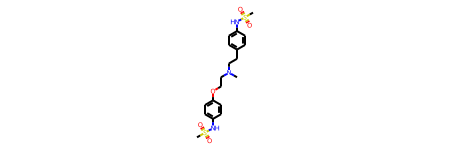

In [16]:
drugbank[100]

In [17]:
len(drugbank)

11290

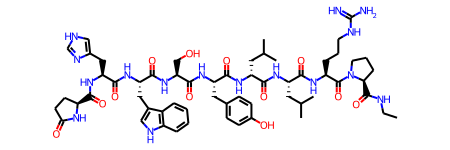

In [38]:
drugbank[1]

In [18]:
from rdkit.Chem import AllChem

for i in range(len(drugbank)):
    AllChem.Compute2DCoords(drugbank[i])

In [19]:
from rdkit import DataStructs

type(drugbank)

drugbank_fps = [Chem.RDKFingerprint(m) for m in drugbank]

In [20]:
len(drugbank_fps)

11290

In [46]:
# ?? Don't know
for idx, x in enumerate(fps[0]):
    if x==1:
        print(idx, x)
print("Last digit : ", idx)

1 1
2 1
6 1
7 1
8 1
14 1
16 1
17 1
20 1
21 1
24 1
25 1
26 1
27 1
28 1
32 1
33 1
37 1
38 1
41 1
42 1
43 1
45 1
50 1
51 1
52 1
54 1
61 1
62 1
65 1
66 1
68 1
70 1
71 1
72 1
73 1
74 1
76 1
77 1
79 1
80 1
83 1
84 1
90 1
92 1
93 1
96 1
101 1
102 1
103 1
104 1
109 1
112 1
114 1
115 1
118 1
122 1
123 1
126 1
129 1
133 1
136 1
138 1
139 1
140 1
141 1
143 1
147 1
148 1
149 1
150 1
151 1
152 1
155 1
156 1
159 1
161 1
163 1
166 1
167 1
168 1
170 1
173 1
174 1
175 1
176 1
179 1
180 1
183 1
184 1
185 1
186 1
187 1
188 1
191 1
192 1
194 1
197 1
198 1
200 1
202 1
205 1
208 1
215 1
221 1
225 1
227 1
233 1
235 1
237 1
238 1
239 1
240 1
244 1
245 1
246 1
249 1
250 1
251 1
254 1
256 1
257 1
258 1
259 1
263 1
264 1
268 1
276 1
280 1
283 1
284 1
285 1
294 1
297 1
298 1
300 1
303 1
304 1
306 1
307 1
308 1
310 1
311 1
312 1
313 1
319 1
321 1
323 1
327 1
330 1
331 1
332 1
333 1
334 1
336 1
337 1
339 1
341 1
342 1
344 1
346 1
351 1
354 1
357 1
358 1
361 1
364 1
367 1
368 1
370 1
372 1
380 1
382 1
390 1
393 1
39

In [21]:
DataStructs.FingerprintSimilarity(drugbank_fps[1000], drugbank_fps[101])

0.23026315789473684

In [22]:
common = [Chem.MolFromSmiles('C1CCCC(C2CCCCC2)CC1'), Chem.MolFromSmiles('C1CCCC1'), Chem.MolFromSmiles('C1CCCCC(C2CCCCCCCCC2)CCCC1'), Chem.MolFromSmiles('C1CCC2(CC1)CCCC2'), Chem.MolFromSmiles('C1CCCCCCCCCCCCCCCCCCC1'), Chem.MolFromSmiles('C1CCCC(C2CCCCCCC2)CCC1'), Chem.MolFromSmiles('C1CCC2(C1)CCC21CCC12CCC2'), Chem.MolFromSmiles('C1CCCC(C2CCCCC2)CCC1'), Chem.MolFromSmiles('C1CCCC(C2CCCCCC2)CC1')]

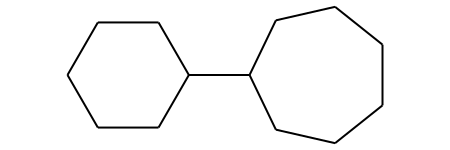

In [23]:
common[0]

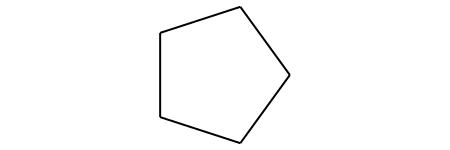

In [24]:
common[1]

In [25]:
type(common[0])

rdkit.Chem.rdchem.Mol

In [26]:
type(common)

list

In [27]:
common_fps = [Chem.RDKFingerprint(m) for m in common]

In [30]:
DataStructs.FingerprintSimilarity(drugbank_fps[0], common_fps[0])

0.02465166130760986

In [31]:
from rdkit import DataStructs

In [32]:
for i in range(len(drugbank_fps)):
    for j in range(len(common_fps)):
        if DataStructs.FingerprintSimilarity(drugbank_fps[i], common_fps[j]) > 0.7:
            print(i, drugbank_fps[i], end = " ")
            print(j, common_fps[j], end = " ")
            print(round(DataStructs.FingerprintSimilarity(drugbank_fps[i], common_fps[j]), 3))

3274 <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x2aece6ae2880> 0 <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x2aece6198760> 0.731
3274 <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x2aece6ae2880> 7 <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x2aece6ba1820> 0.76
4090 <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x2aece6af5f40> 6 <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x2aece6ba1640> 0.8
7803 <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x2aece6b4e5e0> 2 <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x2aece619fac0> 0.714
7803 <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x2aece6b4e5e0> 5 <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x2aece6ba18e0> 0.714


**Adamantane**

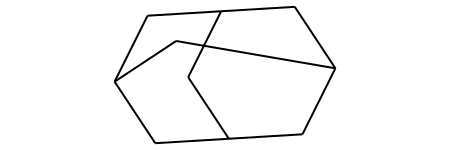

In [81]:
drugbank[3274]

**Camphane (Bornane)**

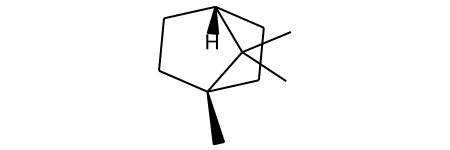

In [83]:
drugbank[4090]

**Squalene**

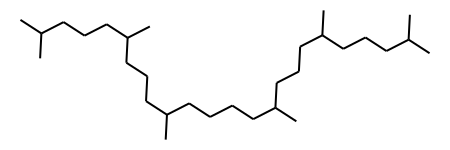

In [91]:
drugbank[7803]

In [95]:
from rdkit.Chem import PandasTools
import pandas as pd
import os
from rdkit import RDConfig

sdfFile = os.path.join(RDConfig.RDDataDir, "/home/charlesseo/zinc/structures.sdf")
frame = PandasTools.LoadSDF(sdfFile, smilesName = "SMILES", molColName = "Molecule", includeFingerprints = True)

RDKit ERROR: [19:12:33] ERROR: Explicit valence for atom # 7 K, 2, is greater than permitted
RDKit ERROR: [19:13:29] Explicit valence for atom # 13 Cl, 5, is greater than permitted
RDKit ERROR: [19:13:29] ERROR: Could not sanitize molecule ending on line 289199
RDKit ERROR: [19:13:29] ERROR: Explicit valence for atom # 13 Cl, 5, is greater than permitted
RDKit ERROR: [19:13:30] Explicit valence for atom # 19 O, 3, is greater than permitted
RDKit ERROR: [19:13:30] ERROR: Could not sanitize molecule ending on line 399275
RDKit ERROR: [19:13:30] ERROR: Explicit valence for atom # 19 O, 3, is greater than permitted
RDKit ERROR: [19:13:31] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [19:13:31] ERROR: Could not sanitize molecule ending on line 522730
RDKit ERROR: [19:13:31] ERROR: Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [19:13:31] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [19:13:31] ERROR: Coul

In [94]:
frame.info

<bound method DataFrame.info of       DATABASE_ID DATABASE_NAME  \
0         DB00006      drugbank   
1         DB00007      drugbank   
2         DB00014      drugbank   
3         DB00027      drugbank   
4         DB00035      drugbank   
...           ...           ...   
11295     DB16735      drugbank   
11296     DB16737      drugbank   
11297     DB16739      drugbank   
11298     DB16741      drugbank   
11299     DB16745      drugbank   

                                                  SMILES  \
0      CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...   
1      CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=N)N)NC(=...   
2      CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...   
3      CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...   
4      N=C(N)NCCC[C@@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...   
...                                                  ...   
11295  NCc1cc(Oc2cccc(C(=O)N3C[C@@H](O)[C@H](F)C3)c2)...   
11296  CC(=O)NCC(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](Cc1...   
11297  

In [97]:
type(frame)

pandas.core.frame.DataFrame

,DATABASE_ID,DATABASE_NAME,SMILES,INCHI_IDENTIFIER,INCHI_KEY,FORMULA,MOLECULAR_WEIGHT,EXACT_MASS,JCHEM_ACCEPTOR_COUNT,JCHEM_ATOM_COUNT,...,DRUGBANK_ID,SECONDARY_ACCESSION_NUMBERS,DRUG_GROUPS,GENERIC_NAME,SYNONYMS,PRODUCTS,INTERNATIONAL_BRANDS,ID,Molecule,SALTS
0,DB00006,drugbank,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...,OIRCOABEOLEUMC-GEJPAHFPSA-N,C98H138N24O33,2180.2853,2178.985813062,37,293,...,DB00006,BTD00076; EXPT03302; BIOD00076; DB02351,approved; investigational,Bivalirudin,Bivalirudin; Bivalirudina; Bivalirudinum,Angiomax; Angiomax RTU; Angiox; Bivalirudin; B...,Angiox; Hirulog,,,NaN
1,DB00007,drugbank,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=N)N)NC(=...,InChI=1S/C59H84N16O12/c1-6-63-57(86)48-14-10-2...,GFIJNRVAKGFPGQ-LIJARHBVSA-N,C59H84N16O12,1209.3983,1208.645462232,16,171,...,DB00007,BTD00009; BIOD00009,approved; investigational,Leuprolide,Leuprorelin; Leuprorelina; Leuproreline; Leupr...,Camcevi; Eligard; Fensolvi; Leuprolide Acetate...,Camcevi; Leuplin; LeuProMaxx; Memryte; Prostap...,,,Leuprolide acetate; Leuprolide mesylate
2,DB00014,drugbank,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-3...,BLCLNMBMMGCOAS-URPVMXJPSA-N,C59H84N18O14,1269.4105,1268.641439486,18,NaN,...,DB00014,BTD00113; BIOD00113,approved,Goserelin,Goserelin; Goserelina,Zoladex; Zoladex LA,NaN,[NO NAME],,Goserelin acetate
3,DB00027,drugbank,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,InChI=1S/C96H135N19O16/c1-50(2)36-71(105-79(11...,NDAYQJDHGXTBJL-MWWSRJDJSA-N,C96H135N19O16,1811.253,1810.033419343,16,266,...,DB00027,BTD00036; BIOD00036,approved,Gramicidin D,Bacillus brevis gramicidin D; Gramicidin; Gram...,Antibiotic Cream; Antibiotic Cream Plus Pain R...,Sofradex,,,NaN
4,DB00035,drugbank,N=C(N)NCCC[C@@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...,InChI=1S/C46H64N14O12S2/c47-35(62)15-14-29-40(...,NFLWUMRGJYTJIN-PNIOQBSNSA-N,C46H64N14O12S2,1069.22,1068.426955905,15,138,...,DB00035,BTD00112; BTD00061; BIOD00112; BIOD00061,approved,Desmopressin,1-(3-mercaptopropionic acid)-8-D-arginine-vaso...,Apo-desmopressin; Bipazen; DDAVP Rhinal Tube; ...,Adiuretin; DesmoMelt,,,Desmopressin acetate; Desmopressin acetate anh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11295,DB16735,drugbank,NCc1cc(Oc2cccc(C(=O)N3C[C@@H](O)[C@H](F)C3)c2)...,InChI=1S/C18H17F4N3O3/c19-13-8-25(9-14(13)26)1...,ODGXXYXJORZPHE-ZIAGYGMSSA-N,C18H17F4N3O3,399.346,399.120604071,4,45,...,DB16735,NaN,investigational,PAT-1251,NaN,NaN,NaN,,,NaN
11296,DB16737,drugbank,CC(=O)NCC(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](Cc1...,InChI=1S/C31H39N9O6S/c1-18(41)36-17-26(43)37-2...,ZEPMYXYJCBQSLH-VABKMULXSA-N,C31H39N9O6S,665.77,665.274401186,10,86,...,DB16737,NaN,experimental,MM3122,Ac-GQFR-kbt,NaN,NaN,,,NaN
11297,DB16739,drugbank,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,InChI=1S/C27H34ClNO2S/c1-17(2)19-10-13-22-21(1...,QAOAOVKBIIKRNL-UHFFFAOYSA-N,C27H34ClNO2S,472.08,471.1998782,2,66,...,DB16739,NaN,experimental,MK-886,NaN,NaN,NaN,,,NaN
11298,DB16741,drugbank,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cncc...,InChI=1S/C25H35BN4O8/c1-15(2)10-21(26-37-22(19...,QDMRNLRJDHCHLB-DNNBANOASA-N,C25H35BN4O8,530.39,530.254794,10,73,...,DB16741,NaN,approved,Bortezomib D-mannitol,Bortezomib D-mannitol ester; Bortezomib D-mann...,Act Bortezomib; Bortezomib; Bortezomib for Inj...,NaN,,,NaN

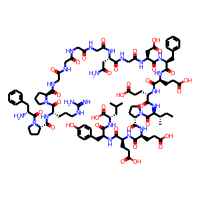
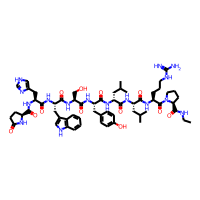
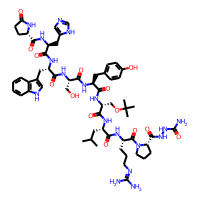
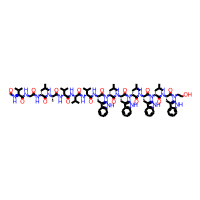
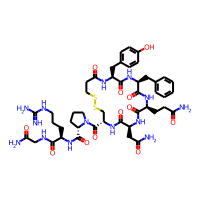
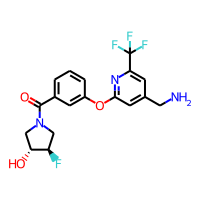
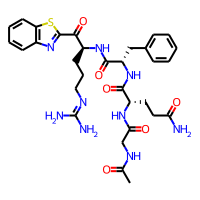
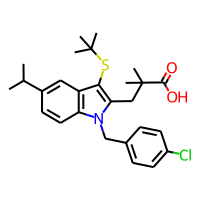
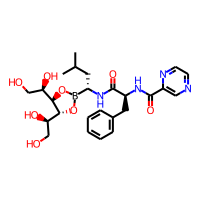
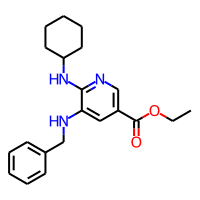

In [98]:
display(frame)

,DATABASE_ID,DATABASE_NAME,SMILES,INCHI_IDENTIFIER,INCHI_KEY,FORMULA,MOLECULAR_WEIGHT,EXACT_MASS,JCHEM_ACCEPTOR_COUNT,JCHEM_ATOM_COUNT,...,DRUGBANK_ID,SECONDARY_ACCESSION_NUMBERS,DRUG_GROUPS,GENERIC_NAME,SYNONYMS,PRODUCTS,INTERNATIONAL_BRANDS,ID,Molecule,SALTS
3270,DB03618,drugbank,CC(=O)N[C@H]1[C@@H](O)O[C@H](CO)[C@@H](O[C@@H]...,InChI=1S/C14H25NO11/c1-4(18)15-7-9(20)12(6(3-1...,KFEUJDWYNGMDBV-RCBHQUQDSA-N,C14H25NO11,383.3484,383.142760647,11,51,...,DB03618,EXPT02354,experimental,2-(acetylamino)-2-deoxy-4-O-beta-D-galactopyra...,NaN,NaN,NaN,,,NaN
3271,DB03619,drugbank,C[C@H](CCC(=O)O)[C@H]1CC[C@H]2[C@@H]3CC[C@@H]4...,InChI=1S/C24H40O4/c1-14(4-9-22(27)28)18-7-8-19...,KXGVEGMKQFWNSR-LLQZFEROSA-N,C24H40O4,392.572,392.292659768,4,NaN,...,DB03619,EXPT01194; DB07690,approved,Deoxycholic acid,"(3α,5β,12α)-3,12-dihydroxycholan-24-oic acid; ...",Belkyra; Debiline; Debiline H; Duchol Ect; Kyb...,NaN,"(3a,5b,12a)-3,12-dihydroxy-Cholan-24-oic acid.mol",,NaN
3272,DB03621,drugbank,CC[C@@H]1/C=C(\C)[C@@H](O)[C@H](C)C[C@H](OC)[C...,InChI=1S/C52H76N2O13/c1-11-35-23-29(2)46(57)30...,APSPCHLQXFEUHG-CPBVNLROSA-N,C52H76N2O13,937.1654,936.534740528,12,NaN,...,DB03621,EXPT00237,experimental,"L-709,587",NaN,NaN,NaN,,,NaN
3273,DB03622,drugbank,O=C1N=C(O)NC(=O)[C@@]1(c1ccccc1)N1CCC(CCO)CC1,InChI=1S/C17H21N3O4/c21-11-8-12-6-9-20(10-7-12...,IPBPOBHSNJFRFT-UHFFFAOYSA-N,C17H21N3O4,331.3663,331.153206175,6,45,...,DB03622,EXPT00635,experimental,5-[4-(2-Hydroxyethyl)-1-piperidinyl]-5-phenyl-...,NaN,NaN,NaN,,,NaN
3274,DB03623,drugbank,Oc1ccc(-c2cnc3ccc4ccncc4c3c2)cc1,InChI=1S/C18H12N2O/c21-15-4-1-12(2-5-15)14-9-1...,IUSSGTWHFMSCOY-UHFFFAOYSA-N,C18H12N2O,272.3007,272.094963016,3,NaN,...,DB03623,EXPT00358,experimental,"9-(4-Hydroxyphenyl)-2,7-Phenanthroline",NaN,NaN,NaN,9HP,,NaN
3275,DB03624,drugbank,C[C@H](N)[C@@H](CCCCCC(=O)O)NC(=O)O,InChI=1S/C10H20N2O4/c1-7(11)8(12-10(15)16)5-3-...,OQNJZSIPDMTUAJ-JGVFFNPUSA-N,C10H20N2O4,232.2768,232.142307138,5,NaN,...,DB03624,EXPT01273,experimental,7-(Carboxyamino)-8-Amino-Nonanoic Acid,NaN,NaN,NaN,,,NaN
3276,DB03626,drugbank,COC1=CC(=O)c2c(c(COc3ccccc3)c(C)n2C)C1=O,InChI=1S/C18H17NO4/c1-11-13(10-23-12-7-5-4-6-8...,JRPJCFILHCLEJI-UHFFFAOYSA-N,C18H17NO4,311.3319,311.115758037,4,NaN,...,DB03626,EXPT00154,experimental,"5-Methoxy-1,2-Dimethyl-3-(Phenoxymethyl)Indole...",NaN,NaN,NaN,340,,NaN
3277,DB03627,drugbank,C1C2CC3CC1CC(C2)C3,InChI=1S/C10H16/c1-7-2-9-4-8(1)5-10(3-7)6-9/h7...,ORILYTVJVMAKLC-YNFQOJQRSA-N,C10H16,136.234,136.125200512,0,NaN,...,DB03627,EXPT00433,experimental,Adamantane,NaN,NaN,NaN,,,NaN
3278,DB03628,drugbank,CCc1ccc(NC(=O)P(=O)(O)O)cc1,InChI=1S/C9H12NO4P/c1-2-7-3-5-8(6-4-7)10-9(11)...,KGNSYMGWPCEFDZ-UHFFFAOYSA-N,C9H12NO4P,229.1696,229.050394389,4,NaN,...,DB03628,EXPT01930,experimental,ISO24,NaN,NaN,NaN,IS2,,NaN
3279,DB03629,drugbank,Cc1c(O)c(C=O)c(COP(=O)(O)O)c[n+]1[O-],InChI=1S/C8H10NO7P/c1-5-8(11)7(3-10)6(2-9(5)12...,BBWRYPTUKZTWFD-UHFFFAOYSA-N,C8H10NO7P,263.1413,263.019488191,6,NaN,...,DB03629,EXPT02377,experimental,Pyridoxal-5'-Phosphate-N-Oxide,NaN,NaN,NaN,,,NaN

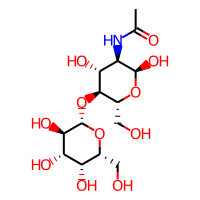
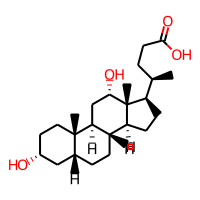
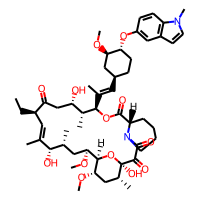
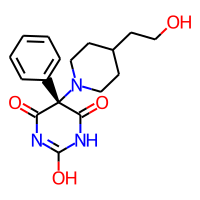
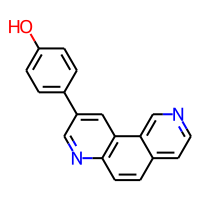
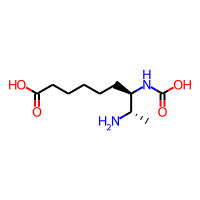
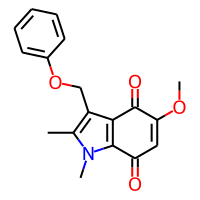
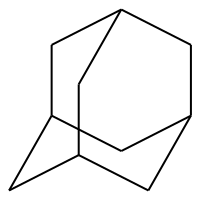
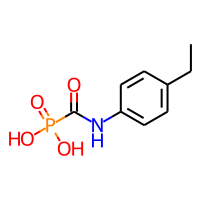
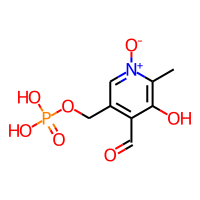
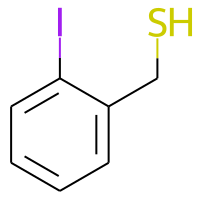

In [110]:
frame.loc[3270:3280]

,DATABASE_ID,DATABASE_NAME,SMILES,INCHI_IDENTIFIER,INCHI_KEY,FORMULA,MOLECULAR_WEIGHT,EXACT_MASS,JCHEM_ACCEPTOR_COUNT,JCHEM_ATOM_COUNT,...,DRUGBANK_ID,SECONDARY_ACCESSION_NUMBERS,DRUG_GROUPS,GENERIC_NAME,SYNONYMS,PRODUCTS,INTERNATIONAL_BRANDS,ID,Molecule,SALTS
4080,DB04485,drugbank,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,InChI=1S/C10H14N2O5/c1-5-3-12(10(16)11-9(5)15)...,IQFYYKKMVGJFEH-XLPZGREQSA-N,C10H14N2O5,242.2286,242.090271568,5,NaN,...,DB04485,EXPT03053,experimental; investigational,Thymidine,2'-deoxy-5-methyluridine; 2'-deoxythymidine; 2...,NaN,NaN,,,NaN
4081,DB04486,drugbank,NCCCCCC[C@H](N)C(=O)O,InChI=1S/C8H18N2O2/c9-6-4-2-1-3-5-7(10)8(11)12...,KMPBBRFCAYFTMR-ZETCQYMHSA-N,C8H18N2O2,174.2407,174.13682783,4,NaN,...,DB04486,EXPT01745,experimental,"(2s)-2,8-Diaminooctanoic Acid",NaN,NaN,NaN,,,NaN
4082,DB04487,drugbank,CN[C@H](CC(C)C)C(=O)O,"InChI=1S/C7H15NO2/c1-5(2)4-6(8-3)7(9)10/h5-6,8...",XJODGRWDFZVTKW-ZCFIWIBFSA-N,C7H15NO2,145.1995,145.110278729,3,25,...,DB04487,EXPT02181,experimental,N-Methylleucine,NaN,NaN,NaN,,,NaN
4083,DB04488,drugbank,CC(=O)OC[C@@H]1CS[C@@H]2[C@H](/N=C(\[O-])CCCC[...,InChI=1S/C19H28N4O9S/c1-9(24)32-7-10-8-33-17-1...,JDAREAJBQYNCGO-UPMYTKPLSA-M,C19H27N4O9S,487.504,487.149874172,10,60,...,DB04488,EXPT01675,experimental,"(6S)-N-[(2S,3R,6R,7R)-3-(Acetyloxymethyl)-2-ca...",NaN,NaN,NaN,,,NaN
4084,DB04489,drugbank,NC(N)=NCCS[C@@H](CC(=O)O)C(=O)O,InChI=1S/C7H13N3O4S/c8-7(9)10-1-2-15-4(6(13)14...,VKVCLXDFOQQABP-BYPYZUCNSA-N,C7H13N3O4S,235.261,235.062676609,7,28,...,DB04489,EXPT01581,experimental,Guanidinoethylmercaptosuccinic acid,GEMSA,NaN,NaN,,,NaN
4085,DB04490,drugbank,SCc1cccnc1,"InChI=1S/C6H7NS/c8-5-6-2-1-3-7-4-6/h1-4,8H,5H2",MBXKCLHOVPXMCJ-UHFFFAOYSA-N,C6H7NS,125.191,125.029919919,1,NaN,...,DB04490,EXPT02713,experimental,3-(Mercaptomethylene)Pyridine,NaN,NaN,NaN,,,NaN
4086,DB04491,drugbank,CC(C)O[PH](=O)OC(C)C,"InChI=1S/C6H15O3P/c1-5(2)8-10(7)9-6(3)4/h5-6,1...",BLKXLEPPVDUHBY-UHFFFAOYSA-N,C6H15O3P,166.1553,166.075880858,1,NaN,...,DB04491,EXPT01171,experimental,Diisopropylphosphono Group,NaN,NaN,NaN,,,NaN
4087,DB04492,drugbank,CC(=O)N[C@H]1[C@@H](O)O[C@H](CO)[C@H](OS(=O)(=...,InChI=1S/C8H15NO9S/c1-3(11)9-5-6(12)7(18-19(14...,WHCJUIFHMJFEFZ-YQXRAVKXSA-N,C8H15NO9S,301.271,301.046751773,8,34,...,DB04492,EXPT02336,experimental,2-(acetylamino)-2-deoxy-4-O-sulfo-alpha-D-gala...,NaN,NaN,NaN,,,NaN
4088,DB04493,drugbank,O=C(CO)[C@@H](O)[C@H](O)[C@H](O)COP(=O)(O)O,InChI=1S/C6H13O9P/c7-1-3(8)5(10)6(11)4(9)2-15-...,GSXOAOHZAIYLCY-HSUXUTPPSA-N,C6H13O9P,260.1358,260.029718526,8,29,...,DB04493,EXPT01383,experimental,Fructose-6-phosphate,D-Fructose 6-phosphate; D-Fructose 6-phosphori...,NaN,NaN,,,NaN
4089,DB04494,drugbank,O=[Mo+6](O)O,InChI=1S/Mo.2H2O.O/h;2*1H2;/q+8;;;/p-2,GKDPEXRCAVYDOG-UHFFFAOYSA-L,H2MoO3,145.95,147.905801776,3,6,...,DB04494,EXPT02435,experimental,Dihydroxy(oxo)molybdenum(6+),NaN,NaN,NaN,,,NaN

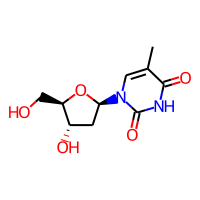
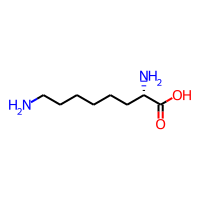
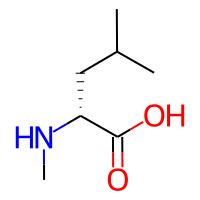
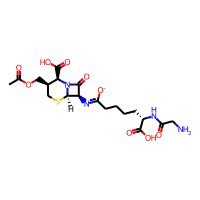
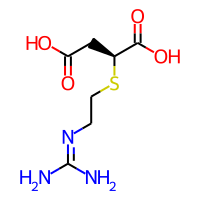
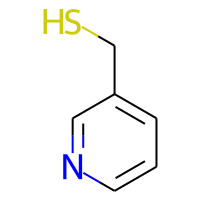
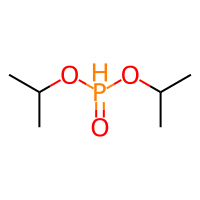
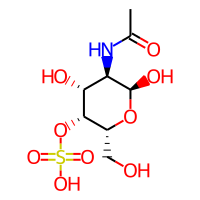
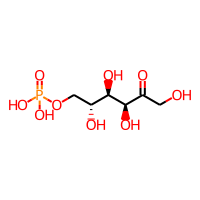
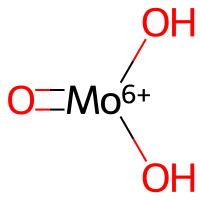
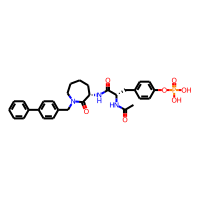
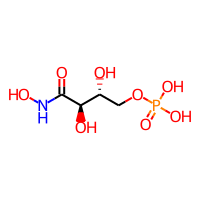
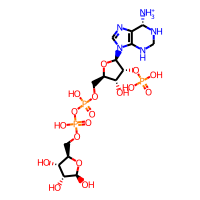
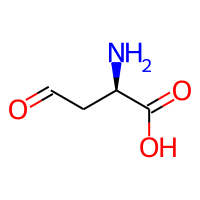
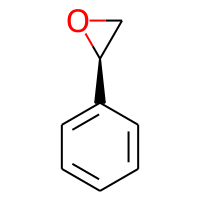
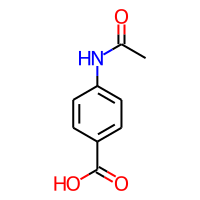
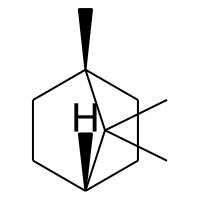
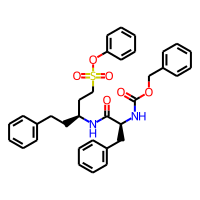
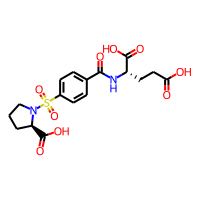
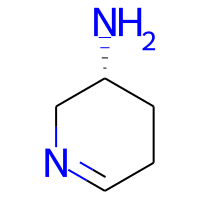
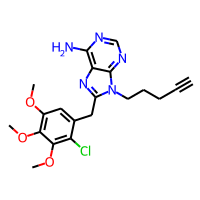

In [111]:
frame.loc[4080:4100]

,DATABASE_ID,DATABASE_NAME,SMILES,INCHI_IDENTIFIER,INCHI_KEY,FORMULA,MOLECULAR_WEIGHT,EXACT_MASS,JCHEM_ACCEPTOR_COUNT,JCHEM_ATOM_COUNT,...,DRUGBANK_ID,SECONDARY_ACCESSION_NUMBERS,DRUG_GROUPS,GENERIC_NAME,SYNONYMS,PRODUCTS,INTERNATIONAL_BRANDS,ID,Molecule,SALTS
7780,DB11380,drugbank,CC(C)OC(=O)Nc1ccc2[nH]c(-c3cscn3)nc2c1,InChI=1S/C14H14N4O2S/c1-8(2)20-14(19)16-9-3-4-...,QZWHWHNCPFEXLL-UHFFFAOYSA-N,C14H14N4O2S,302.35,302.083746881,4,35,...,DB11380,NaN,experimental; vet_approved,Cambendazole,Cambendazol; Cambendazole; Cambendazolum,NaN,NaN,,,NaN
7781,DB11382,drugbank,NC(=O)Nc1ccc([As](=O)(O)O)cc1,InChI=1S/C7H9AsN2O4/c9-7(11)10-6-3-1-5(2-4-6)8...,WWXBHTZSYYGCSG-UHFFFAOYSA-N,C7H9AsN2O4,260.079,259.977828203,4,23,...,DB11382,NaN,vet_approved,Carbarsone,Carbarson; Carbarsone; Carbarsonum; Pentarsone...,NaN,NaN,,,NaN
7782,DB11383,drugbank,CO[C@@H]1[C@@H](O[C@@H]2O[C@H](C)[C@@H](O[C@H]...,InChI=1S/C42H67NO16/c1-21(2)16-32(47)57-40-25(...,FQVHOULQCKDUCY-OGHXVOSASA-N,C42H67NO16,841.9785,841.445985101,14,126,...,DB11383,NaN,vet_approved,Carbomycin,Carbomicina; Carbomycin; Carbomycin A; Carbomy...,NaN,NaN,,,NaN
7783,DB11385,drugbank,NC(=O)c1cc[n+](CC2=C(C(=O)[O-])N3C(=O)[C@@H](N...,InChI=1S/C20H18N4O5S2/c21-17(26)11-3-5-23(6-4-...,FMZXNVLFJHCSAF-DNVCBOLYSA-N,C20H18N4O5S2,458.51,458.071862044,5,49,...,DB11385,NaN,experimental; vet_approved,Cefalonium,Cefalonio; Cefalonium; Cephalonium,NaN,NaN,,,NaN
7784,DB11386,drugbank,CC(C)(O)C(Cl)(Cl)Cl,"InChI=1S/C4H7Cl3O/c1-3(2,8)4(5,6)7/h8H,1-2H3",OSASVXMJTNOKOY-UHFFFAOYSA-N,C4H7Cl3O,177.45,175.9562479,1,15,...,DB11386,NaN,approved; investigational; vet_approved,Chlorobutanol,Chloretone; Chlorobutanol,Aurisan Dps; Balminil Nasal Ointment; Cerumol;...,NaN,,,Chlorobutanol hemihydrate
7785,DB11387,drugbank,ClC(Cl)Cl,InChI=1S/CHCl3/c2-1(3)4/h1H,HEDRZPFGACZZDS-UHFFFAOYSA-N,CHCl3,119.378,117.914383153,0,5,...,DB11387,NaN,approved; vet_approved,Chloroform,"1,1,1-trichloromethane; CHCl3; Chloroforme; ch...",NaN,NaN,,,NaN
7786,DB11389,drugbank,Nc1cc(C(Cl)=C(Cl)Cl)c(S(N)(=O)=O)cc1S(N)(=O)=O,InChI=1S/C8H8Cl3N3O4S2/c9-7(8(10)11)3-1-4(12)6...,QOVTVIYTBRHADL-UHFFFAOYSA-N,C8H8Cl3N3O4S2,380.64,378.9021812,5,28,...,DB11389,NaN,vet_approved,Clorsulon,Clorsulon,NaN,NaN,,,NaN
7787,DB11390,drugbank,CCOP(=S)(OCC)Oc1ccc2c(C)c(Cl)c(=O)oc2c1,"InChI=1S/C14H16ClO5PS/c1-4-17-21(22,18-5-2)20-...",BXNANOICGRISHX-UHFFFAOYSA-N,C14H16ClO5PS,362.766,362.014458531,1,38,...,DB11390,NaN,vet_approved,Coumaphos,3-Chloro-4-methyl-7-coumarinyl diethyl phospho...,NaN,Meldane,,,NaN
7788,DB11392,drugbank,COP(=S)(OC)Oc1ccc(S(N)(=O)=O)cc1,"InChI=1S/C8H12NO5PS2/c1-12-15(16,13-2)14-7-3-5...",BSBSDQUZDZXGFN-UHFFFAOYSA-N,C8H12NO5PS2,297.28,296.989451836,2,29,...,DB11392,NaN,vet_approved,Cythioate,NaN,NaN,Proban,,,NaN
7789,DB11393,drugbank,CN1C[C@@H]2C[C@H]1CN2c1cc2c(cc1F)c(=O)c(C(=O)O...,InChI=1S/C19H20FN3O3/c1-21-7-12-4-11(21)8-22(1...,QMLVECGLEOSESV-RYUDHWBXSA-N,C19H20FN3O3,357.385,357.148869679,6,46,...,DB11393,NaN,experimental; vet_approved,Danofloxacin,Danofloxacin; Danofloxacine; Danofloxacino; Da...,NaN,Advocin,,,Danofloxacin mesylate

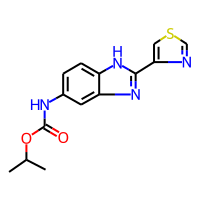
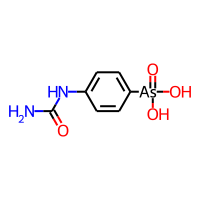
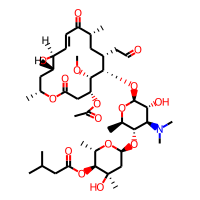
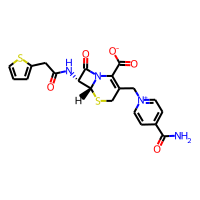
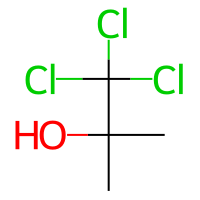
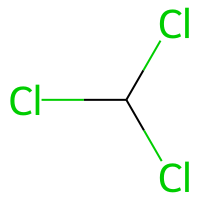
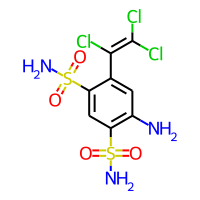
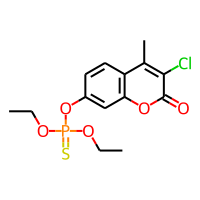
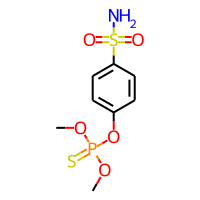
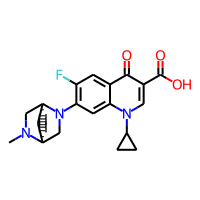
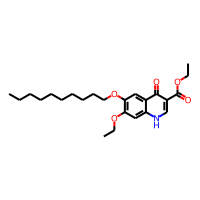
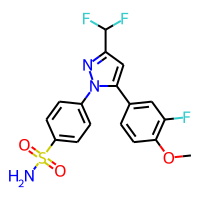
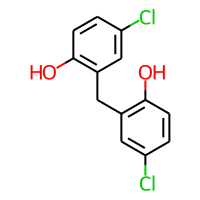
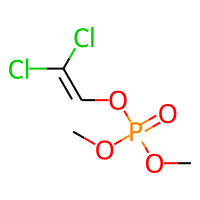
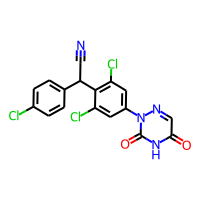
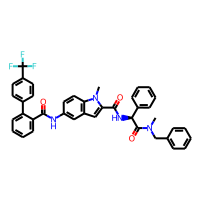
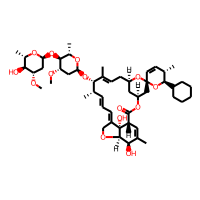
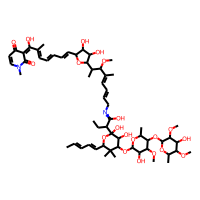
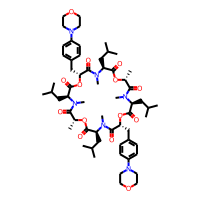
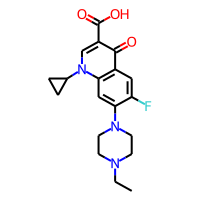
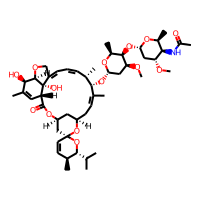
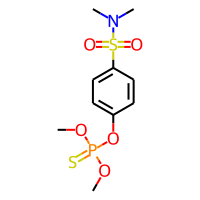
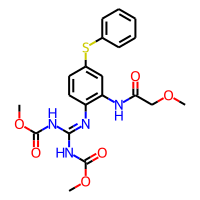
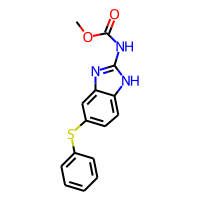
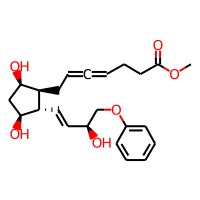
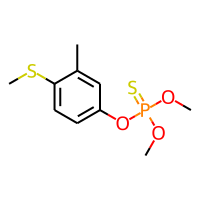
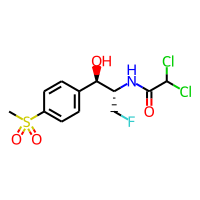
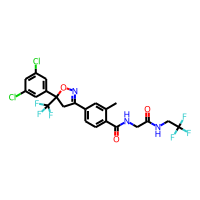
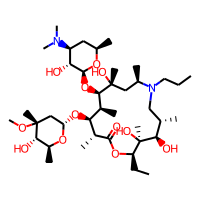
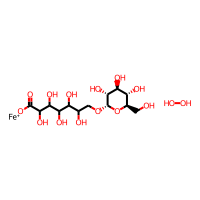
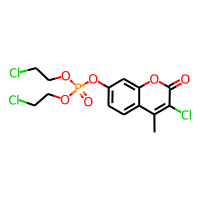
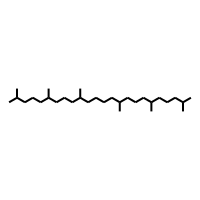
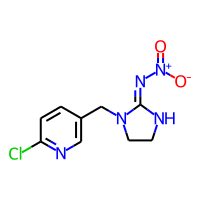
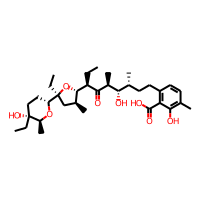
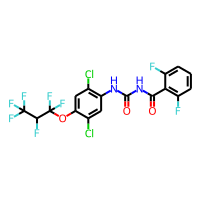
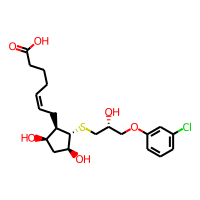
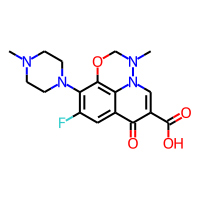
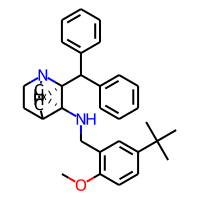
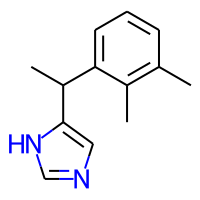
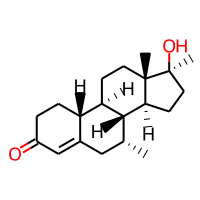
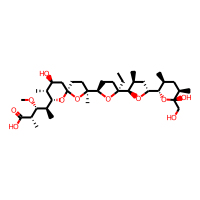

In [113]:
frame.loc[7780:7820]

In [101]:
frame_df = [m for m in frame if m] 

In [102]:
len(frame_df)

44

In [103]:
display(frame_df)

['DATABASE_ID',
 'DATABASE_NAME',
 'SMILES',
 'INCHI_IDENTIFIER',
 'INCHI_KEY',
 'FORMULA',
 'MOLECULAR_WEIGHT',
 'EXACT_MASS',
 'JCHEM_ACCEPTOR_COUNT',
 'JCHEM_ATOM_COUNT',
 'JCHEM_AVERAGE_NEUTRAL_MICROSPECIES_CHARGE',
 'JCHEM_AVERAGE_POLARIZABILITY',
 'JCHEM_BIOAVAILABILITY',
 'JCHEM_DONOR_COUNT',
 'JCHEM_FORMAL_CHARGE',
 'JCHEM_GHOSE_FILTER',
 'JCHEM_IUPAC',
 'ALOGPS_LOGP',
 'JCHEM_LOGP',
 'ALOGPS_LOGS',
 'JCHEM_MDDR_LIKE_RULE',
 'JCHEM_NEUTRAL_CHARGE',
 'JCHEM_NUMBER_OF_RINGS',
 'JCHEM_PHYSIOLOGICAL_CHARGE',
 'JCHEM_PKA',
 'JCHEM_PKA_STRONGEST_ACIDIC',
 'JCHEM_PKA_STRONGEST_BASIC',
 'JCHEM_POLAR_SURFACE_AREA',
 'JCHEM_REFRACTIVITY',
 'JCHEM_ROTATABLE_BOND_COUNT',
 'JCHEM_RULE_OF_FIVE',
 'ALOGPS_SOLUBILITY',
 'JCHEM_TRADITIONAL_IUPAC',
 'JCHEM_VEBER_RULE',
 'DRUGBANK_ID',
 'SECONDARY_ACCESSION_NUMBERS',
 'DRUG_GROUPS',
 'GENERIC_NAME',
 'SYNONYMS',
 'PRODUCTS',
 'INTERNATIONAL_BRANDS',
 'ID',
 'Molecule',
 'SALTS']

In [99]:
drugbank_df = pd.DataFrame(drugbank)

,0
0,
1,
2,
3,
4,
...,...
11285,
11286,
11287,
11288,

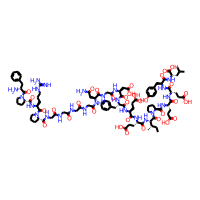
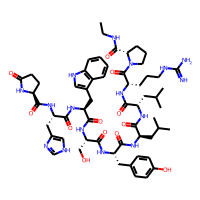
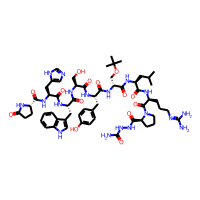
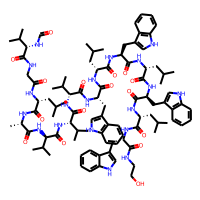
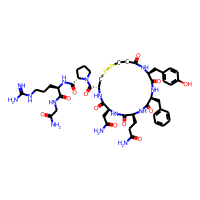
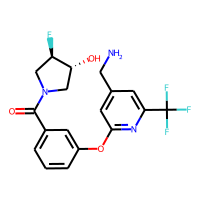
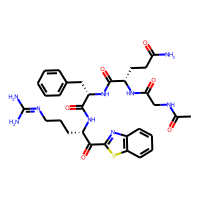
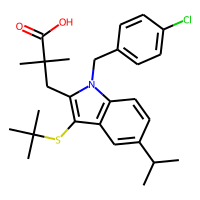
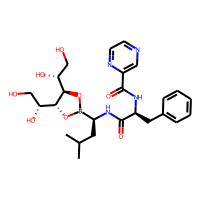
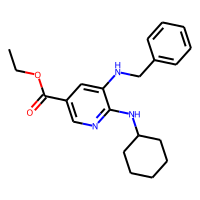

In [100]:
display(drugbank_df)

In [87]:
drugbank_fps[4090]

In [88]:
len(drugbank)

11290

In [89]:
len(drugbank_fps)

11290

In [85]:
type(drugbank_fps)

list

**May25**

In [7]:
type(drugbank_input)

rdkit.Chem.rdmolfiles.SDMolSupplier

In [8]:
drugbank = [m for m in drugbank_input if m is not None]

RDKit ERROR: [13:57:55] ERROR: Explicit valence for atom # 13 Cl, 5, is greater than permitted
RDKit ERROR: [14:00:57] Explicit valence for atom # 13 Cl, 5, is greater than permitted
RDKit ERROR: [14:00:57] ERROR: Could not sanitize molecule ending on line 289199
RDKit ERROR: [14:00:57] ERROR: Explicit valence for atom # 13 Cl, 5, is greater than permitted
RDKit ERROR: [14:00:57] Explicit valence for atom # 19 O, 3, is greater than permitted
RDKit ERROR: [14:00:57] ERROR: Could not sanitize molecule ending on line 399275
RDKit ERROR: [14:00:57] ERROR: Explicit valence for atom # 19 O, 3, is greater than permitted
RDKit ERROR: [14:00:57] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:00:57] ERROR: Could not sanitize molecule ending on line 522730
RDKit ERROR: [14:00:57] ERROR: Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:00:57] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:00:57] ERROR: Co

In [9]:
len(drugbank)

11290

In [10]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold

drugbank_atomic_scaffolds = [MurckoScaffold.GetScaffoldForMol(mol) for mol in drugbank]
for i in drugbank_atomic_scaffolds:
    i.Compute2DCoords()

RDKit WARNING: [14:01:17] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [14:01:17] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [14:01:17] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [14:01:17] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [14:01:17] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [14:01:17] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [14:01:17] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [14:01:17] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [14:01:17] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [14:01:17] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [14:01:17] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [14:01:17] WARNING: bond found with stereo spec but no stereo atoms
RDKi

In [11]:
def genericize_scaffold(s):
    try:
        return MurckoScaffold.MakeScaffoldGeneric(s)
    except ValueError:
        return None

In [12]:
drugbank_graph_scaffolds = [genericize_scaffold(s) for s in drugbank_atomic_scaffolds]

RDKit ERROR: [14:00:59] ERROR: Explicit valence for atom # 7 K, 2, is greater than permitted
RDKit ERROR: [14:02:19] Explicit valence for atom # 41 C, 5, is greater than permitted
RDKit ERROR: [14:02:20] Explicit valence for atom # 30 C, 6, is greater than permitted
RDKit ERROR: [14:02:20] Explicit valence for atom # 3 C, 10, is greater than permitted
RDKit ERROR: [14:02:20] Explicit valence for atom # 30 C, 6, is greater than permitted
RDKit ERROR: [14:02:21] Explicit valence for atom # 0 C, 5, is greater than permitted
RDKit ERROR: [14:02:22] Explicit valence for atom # 0 C, 6, is greater than permitted
RDKit ERROR: [14:02:23] Explicit valence for atom # 12 C, 5, is greater than permitted


In [12]:
len(drugbank), len(drugbank_atomic_scaffolds), len(drugbank_graph_scaffolds)

(11290, 11290, 11290)

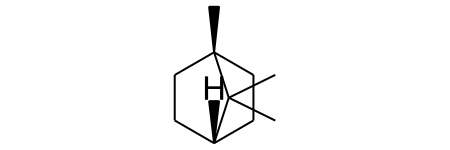

In [16]:
drugbank[4090]

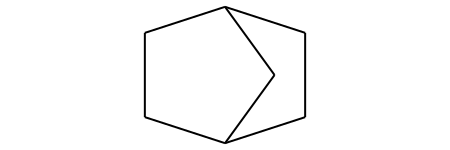

In [17]:
drugbank_graph_scaffolds[4090]

In [34]:
Chem.MolToSmiles(drugbank_graph_scaffolds[4090])

'C1CC2CCC1C2'

In [25]:
drugbank_genericized_smiles = [Chem.MolToSmiles(scaffold) for scaffold in drugbank_graph_scaffolds if scaffold != None]

In [26]:
type(drugbank_genericized_smiles)

list

In [28]:
drugbank_genericized_fps = [Chem.RDKFingerprint(m) for m in drugbank_genericized_smiles]

ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.RDKFingerprint(str)
did not match C++ signature:
    RDKFingerprint(RDKit::ROMol mol, unsigned int minPath=1, unsigned int maxPath=7, unsigned int fpSize=2048, unsigned int nBitsPerHash=2, bool useHs=True, double tgtDensity=0.0, unsigned int minSize=128, bool branchedPaths=True, bool useBondOrder=True, boost::python::api::object atomInvariants=0, boost::python::api::object fromAtoms=0, boost::python::api::object atomBits=None, boost::python::api::object bitInfo=None)

In [27]:
# Export Genericized Drugbank Dataset to sdf File
with Chem.SDWriter("/home/charlesseo/zinc/drugbank_genericized.sdf") as fout:
    for m in drugbank_genericized_smiles:
        fout.write(m)

AttributeError: __enter__

In [22]:
writer = Chem.SDWriter("/home/charlesseo/zinc/drugbank_genericized.sdf")

In [23]:
for m in drugbank_graph_scaffolds:
    writer.write(m)

ArgumentError: Python argument types in
    SDWriter.write(SDWriter, NoneType)
did not match C++ signature:
    write(RDKit::SDWriter {lvalue} self, RDKit::ROMol {lvalue} mol, int confId=-1)

In [32]:
import rdkit

In [13]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

for i in range(len(drugbank_graph_scaffolds)):
    AllChem.Compute2DCoords(drugbank_graph_scaffolds[i])

ArgumentError: Python argument types in
    rdkit.Chem.rdDepictor.Compute2DCoords(NoneType)
did not match C++ signature:
    Compute2DCoords(RDKit::ROMol {lvalue} mol, bool canonOrient=True, bool clearConfs=True, boost::python::dict {lvalue} coordMap={}, unsigned int nFlipsPerSample=0, unsigned int nSample=0, int sampleSeed=0, bool permuteDeg4Nodes=False, double bondLength=-1.0, bool forceRDKit=False)

In [14]:
import rdkit
from rdkit import Chem
from rdkit import DataStructs

drugbank_graph_fps = [Chem.RDKFingerprint(m) for m in drugbank_graph_scaffolds]

ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.RDKFingerprint(NoneType)
did not match C++ signature:
    RDKFingerprint(RDKit::ROMol mol, unsigned int minPath=1, unsigned int maxPath=7, unsigned int fpSize=2048, unsigned int nBitsPerHash=2, bool useHs=True, double tgtDensity=0.0, unsigned int minSize=128, bool branchedPaths=True, bool useBondOrder=True, boost::python::api::object atomInvariants=0, boost::python::api::object fromAtoms=0, boost::python::api::object atomBits=None, boost::python::api::object bitInfo=None)

In [1]:
import rdkit
from rdkit import DataStructs

In [15]:
drugbank_graph_fps = [Chem.RDKFingerprint(m) for m in drugbank_graph_scaffolds]

ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.RDKFingerprint(NoneType)
did not match C++ signature:
    RDKFingerprint(RDKit::ROMol mol, unsigned int minPath=1, unsigned int maxPath=7, unsigned int fpSize=2048, unsigned int nBitsPerHash=2, bool useHs=True, double tgtDensity=0.0, unsigned int minSize=128, bool branchedPaths=True, bool useBondOrder=True, boost::python::api::object atomInvariants=0, boost::python::api::object fromAtoms=0, boost::python::api::object atomBits=None, boost::python::api::object bitInfo=None)

In [20]:
type(drugbank_graph_scaffolds)

list

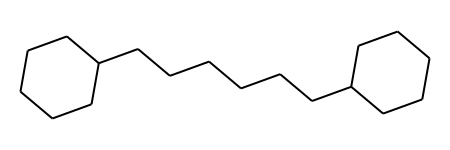

In [26]:
drugbank_graph_scaffolds[100]